In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")


url = "heart.csv"

try:
    df = pd.read_csv(url)
    print("✅ Data Loaded Successfully!")
    print(f"Shape: {df.shape}")
except:
    print("❌ Error loading data. Please ensure internet connection or file path is correct.")

# Preview the data
df.head()

✅ Data Loaded Successfully!
Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


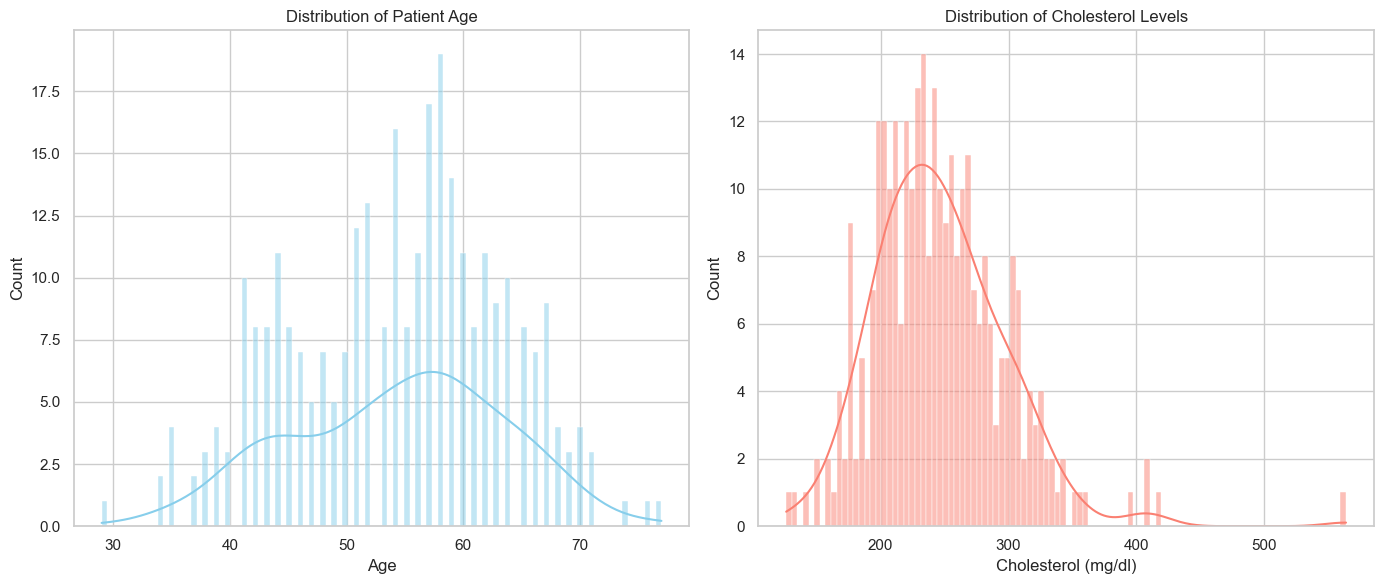

In [9]:
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Age
plt.subplot(1,2,1)
sns.histplot(data=df, x='age', kde=True, color='skyblue', bins=40)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')

# Subplot 2: Distribution of Cholesterol
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='chol', kde=True, color='salmon', bins=102plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

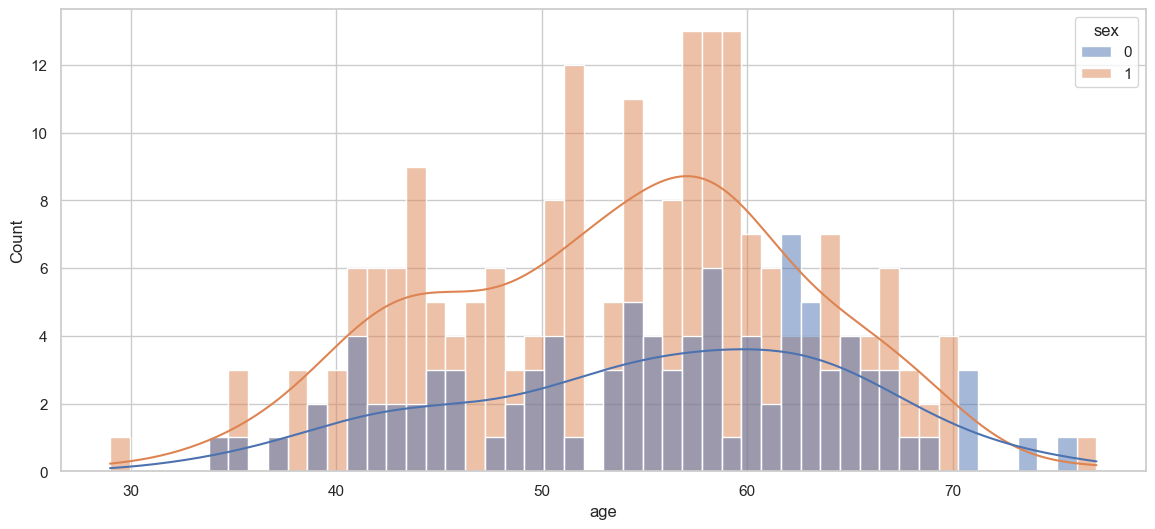

In [13]:
plt.figure(figsize=(14, 6))

sns.histplot(data=df, x='age', hue='sex', kde=True, bins =50)

### Boxplot and Violin PLot

* **Boxplot**

Shows the summary statistics: Median, Quartiles (Q1, Q3), and Outliers (dots beyond whiskers).
* **Violin Plot**

Combines a Boxplot with a KDE (Distribution plot). It shows the shape of the data distribution (fat parts mean more data points).

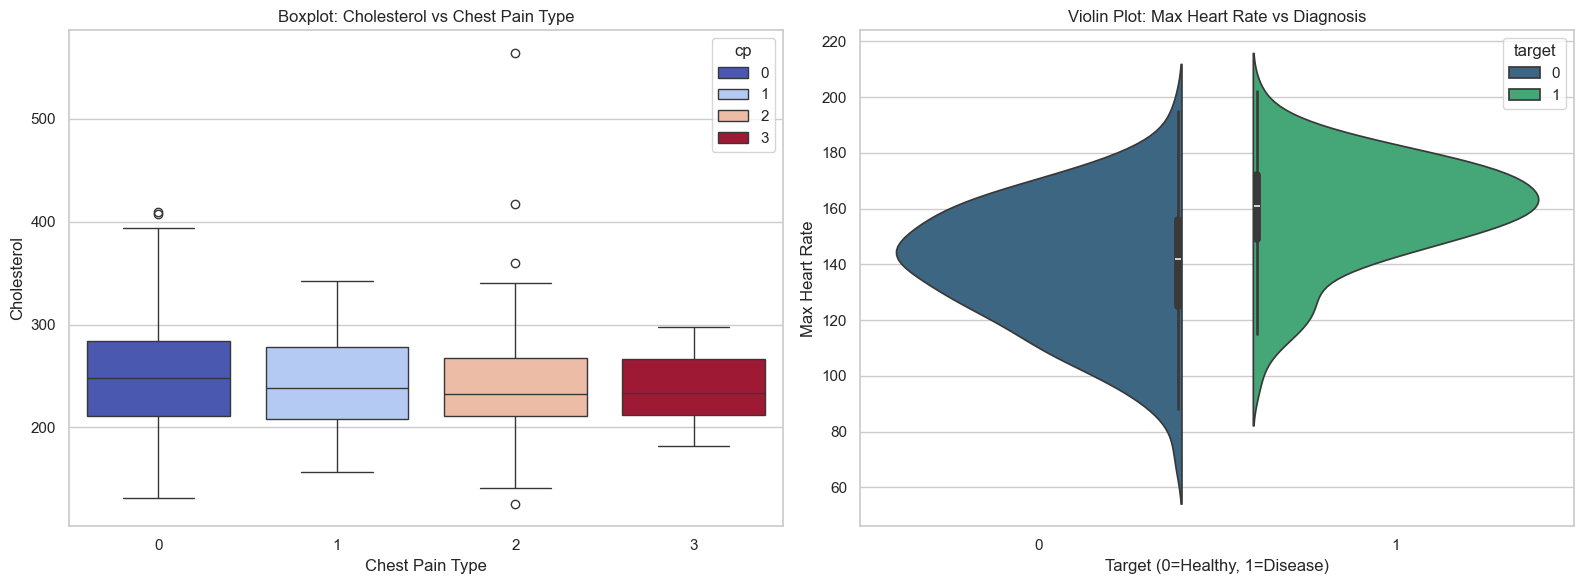

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], data=df, x='cp', y='chol',hue='cp', palette='coolwarm')
axes[0].set_title('Boxplot: Cholesterol vs Chest Pain Type')
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Cholesterol')

sns.violinplot(ax=axes[1], data=df, x='target', y='thalach',hue='target', palette='viridis', split=True)
axes[1].set_title('Violin Plot: Max Heart Rate vs Diagnosis')
axes[1].set_xlabel('Target (0=Healthy, 1=Disease)')
axes[1].set_ylabel('Max Heart Rate')

plt.tight_layout()
plt.show()

## Pairplot

**Goal:** Visualize pairwise relationships in the entire dataset.

A Pairplot plots every numerical column against every other numerical column.
* **Diagonal:** Shows the distribution (histogram/KDE) of that specific variable.
* **Scatter plots:** Shows the relationship between two variables.

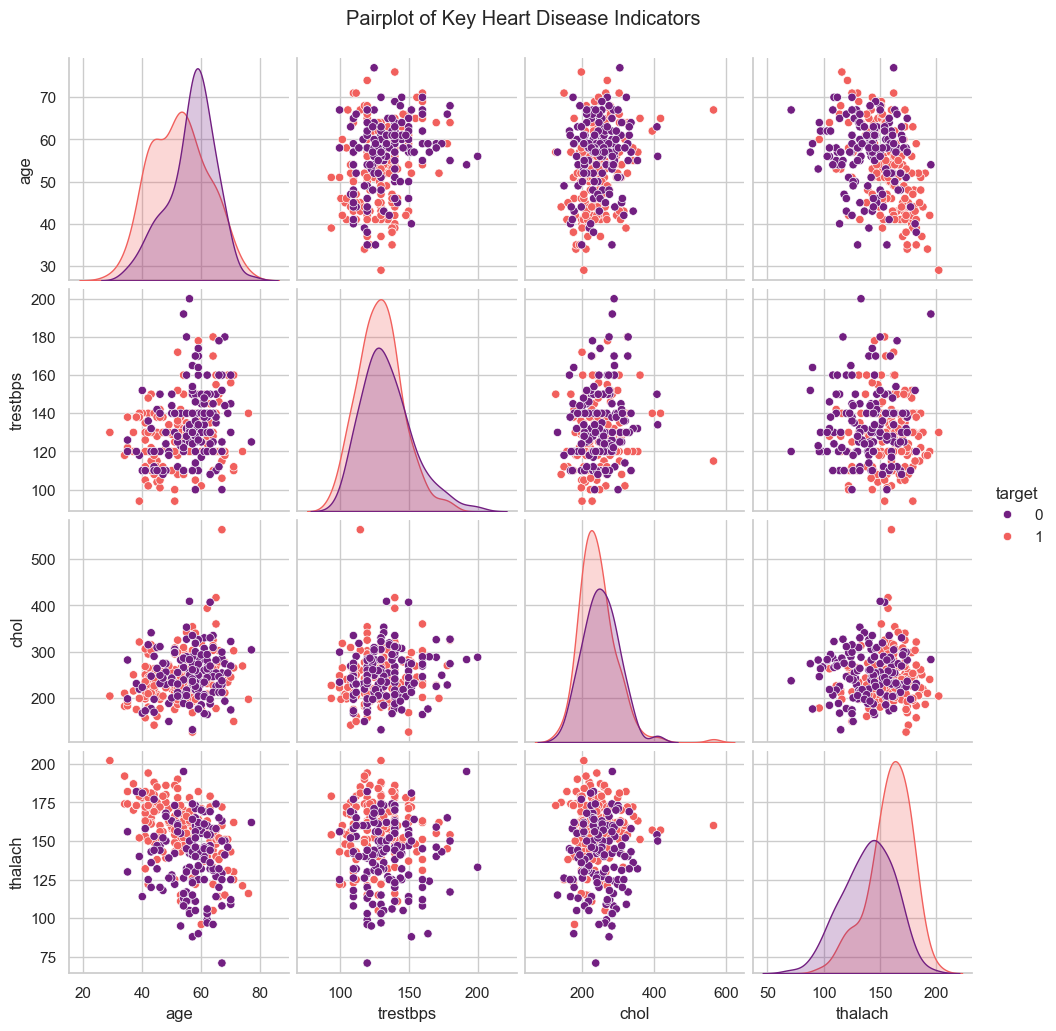

In [21]:
cols_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'target']

sns.pairplot(df[cols_to_plot], hue='target', palette='magma', diag_kind='kde')

plt.suptitle("Pairplot of Key Heart Disease Indicators", y=1.03)
plt.show()

## Correlation matrix and Heatmap

**Goal:** Quantify the linear relationship between variables.

**Correlation Matrix:** A table showing correlation coefficients (from -1 to +1).
* `+1`: Perfect positive correlation.
* `0`: No correlation.
* `-1`: Perfect negative correlation.

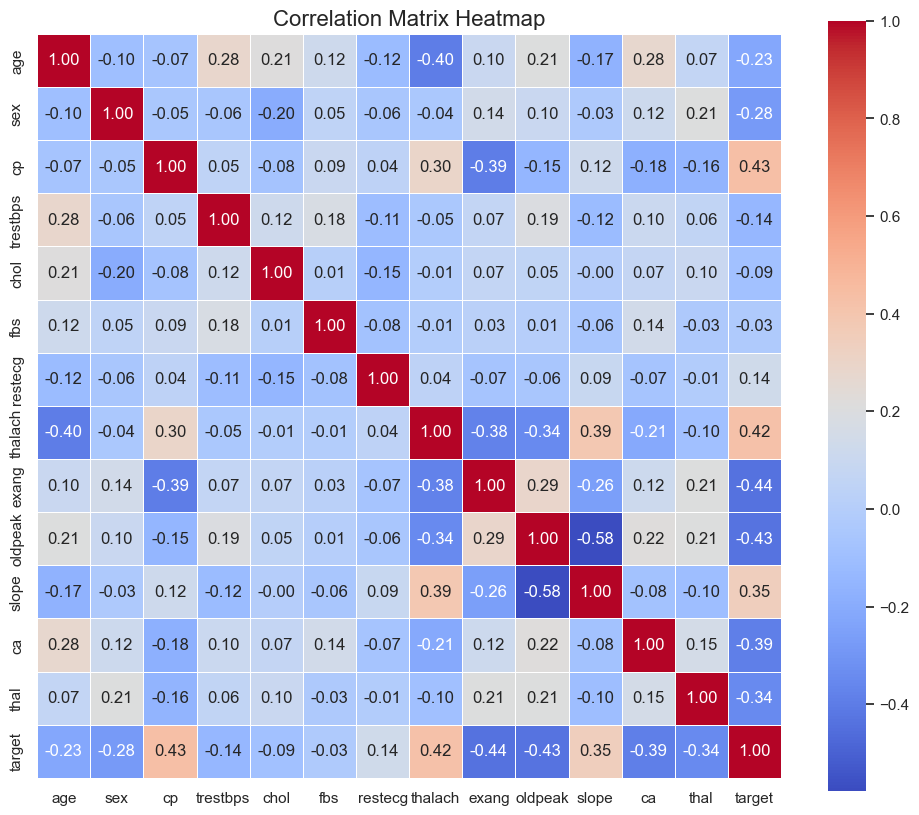

In [24]:
corr_matrix = df.corr()

# 2. Plot the Heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            annot=True,        # Show the numbers
            fmt=".2f",         # Format to 2 decimal places
            cmap='coolwarm',   # Red = High correlation, Blue = Low
            linewidths=0.5,    # Space between squares
            square=True,
            cbar_kws={"shrink": 1})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()
